<a href="https://colab.research.google.com/github/Andro2k/Metodos-Numericos/blob/main/Tarea_07_splines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://colab.research.google.com/drive/19ACAGL3NO1j_MMNykN_8Ydjd5DSJCMgv?usp=sharing">**Tarea 7**</a>
* **Estudiante:** Jose Luis Andino
* **Materia:** Metodos Numericos
* **Carrera:** Computación
* **Docente:** Jonathan A. Zea

# **Conjunto de Ejercicios**


### **Ejercicio 1**
1. Dados los puntos (0,1), (1,5), (2,3), determine el spline cúbico.

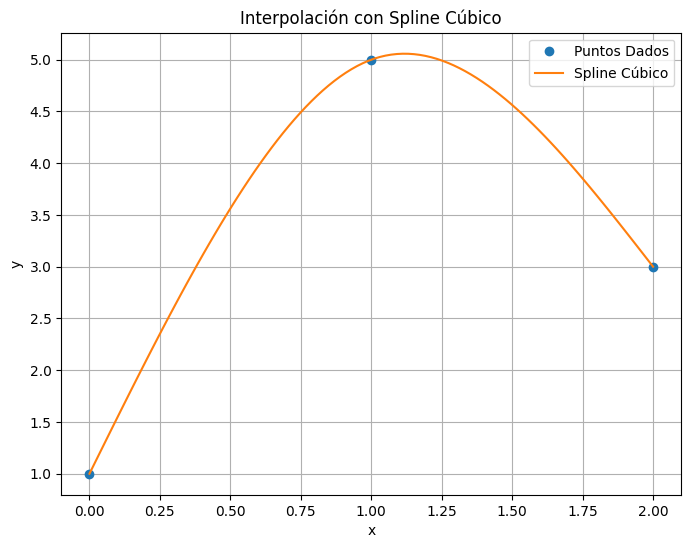

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Puntos dados
x = np.array([0, 1, 2])
y = np.array([1, 5, 3])

# Calcular el spline cúbico
cs = CubicSpline(x, y, bc_type='natural')

# Generar valores para graficar el spline
x_denso = np.linspace(0, 2, 100)
y_denso = cs(x_denso)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Puntos Dados')
plt.plot(x_denso, y_denso, '-', label='Spline Cúbico')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación con Spline Cúbico')
plt.grid(True)
plt.show()

### **Ejercicio 2**
2. Dados los puntos (-1,1), (1,3), determine el spline cúbico sabiendo que $𝑓′(𝑥_0) = 1, 𝑓′(𝑥_𝑛) = 2$.

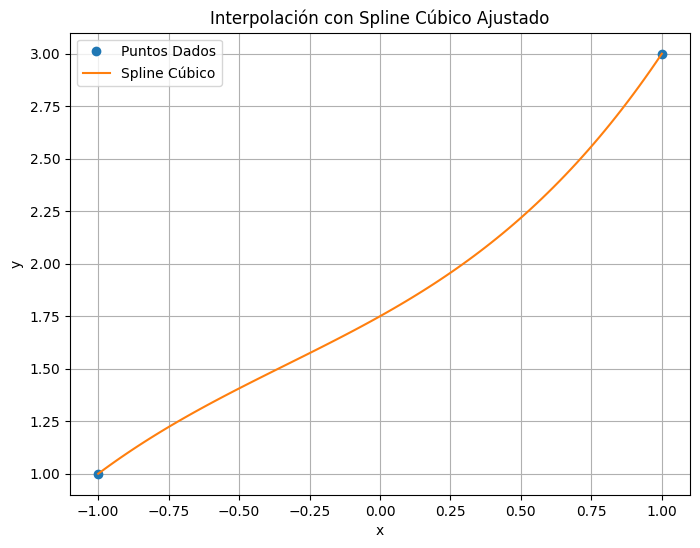

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Puntos dados
x = np.array([-1, 1])
y = np.array([1, 3])

# Condiciones de contorno
tipo_bc = ((1, 1), (1, 2))  # pares (orden, valor) para condiciones ajustadas

# Calcular el spline cúbico
cs = CubicSpline(x, y, bc_type=tipo_bc)

# Generar valores para graficar el spline
x_denso = np.linspace(-1, 1, 100)
y_denso = cs(x_denso)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Puntos Dados')
plt.plot(x_denso, y_denso, '-', label='Spline Cúbico')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación con Spline Cúbico Ajustado')
plt.grid(True)
plt.show()


### **Ejercicio 3**
3. Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:

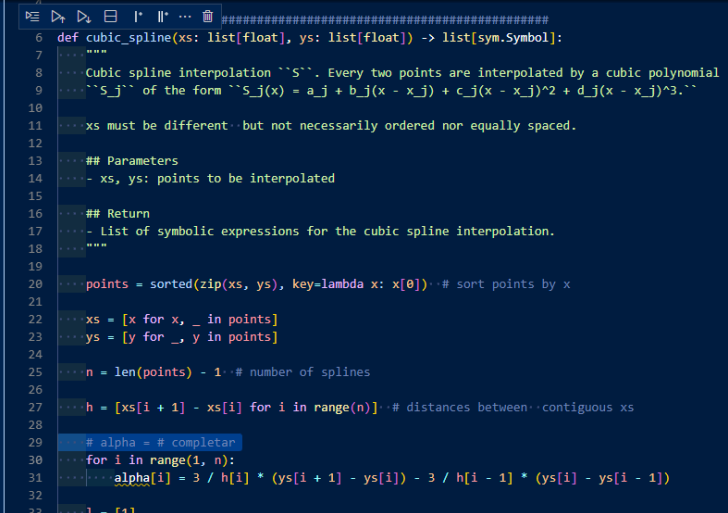

In [ ]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Interpolación de splines cúbicos ``S``. Cada dos puntos son interpolados por un polinomio cúbico
    ``S_j`` de la forma ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs deben ser diferentes pero no necesariamente ordenados ni igualmente espaciados.

    ## Parámetros
    - xs, ys: puntos a interpolar

    ## Retorno
    - Lista de expresiones simbólicas para la interpolación del spline cúbico.
    """

    puntos = sorted(zip(xs, ys), key=lambda x: x[0])  # ordenar puntos por x

    xs = [x for x, _ in puntos]
    ys = [y for _, y in puntos]

    n = len(puntos) - 1  # número de splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distancias entre xs contiguos

    alpha = [0] * (n)  # inicializar alpha
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1] * (n + 1)
    u = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines

# Ejemplo de uso:
xs = [0, 1, 2]
ys = [1, 5, 3]
splines = cubic_spline(xs, ys)
for spline in splines:
    display(spline)


1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

### **Ejercicio 4**
4. Usando la función anterior, encuentre el spline cúbico para:

    ```python
    xs = [1, 2, 3]
    ys = [2, 3, 5]
    ```


In [ ]:
# Ejercicio 4
xs = [1, 2, 3]
ys = [2, 3, 5]
splines = cubic_spline(xs, ys)
for spline in splines:
    display(spline)

1 3 1.5 0.75 -0.25
0 2 0.75 0.0 0.25


0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

### **Ejercicio 5**
5. Usando la función anterior, encuentre el spline cúbico para:

    ```python
    xs = [0, 1, 2, 3]
    ys = [-1, 1, 5, 2]
    ```

In [ ]:
# Ejercicio 4
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]
splines = cubic_spline(xs, ys)
for spline in splines:
    display(spline)

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

### **Ejercicio 6**
6. Use la función `cubic_spline_clamped`, provista en el enlace de Github, para graficar los datos de la siguiente tabla.
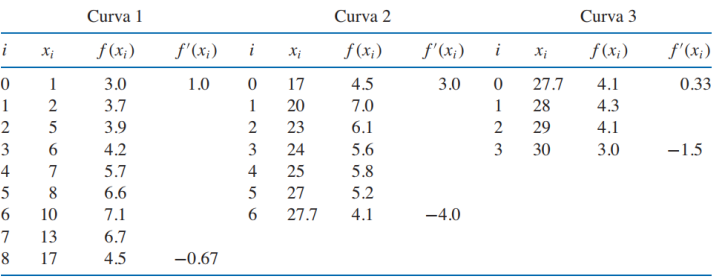

In [ ]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline_clamped(
    xs: list[float], ys: list[float], d0: float, dn: float
) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated
    - d0, dn: derivatives at the first and last points

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * d0
    alpha[-1] = 3 * dn - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

6 6.7 -0.3110632057486433 -0.08946839712567833 0.007433549640709791
5 7.1 -0.04627877987974775 0.0012069218360464644 -0.010075035440191645
4 5.7 1.4961783252676344 -0.5153592902185071 0.057396245783839284
3 4.2 0.992284059246224 1.0192535562399176 -0.5115376154861416
2 3.9 -0.06531456225252952 0.03834506525883588 0.32696949699369393
1 3.7 0.4456643202815664 -0.20867135943686782 0.027446269410633745
0 3.0 1.0 -0.3456643202815658 0.045664320281565994
4 5.8 0.588745731370882 0.3457850549516096 -0.2951982180205568
3 5.6 -0.23170640779015478 0.47466708420942766 -0.04296067641927268
2 6.1 -0.5619201002102627 -0.1444533917893198 0.20637349199958246
1 7.0 -0.2095199749474344 0.02698668336837705 -0.01904889723974409
0 4.5 3.0 -1.0968266750175217 0.12486815093176652
2 4.1 -0.7653465346534649 -0.26930693069306927 -0.06534653465346556
1 4.3 0.6613861386138599 -1.1574257425742556 0.2960396039603954
0 4.1 0.3299999999999999 2.2620462046204524 -3.799413274660778
Splines para Curva 1:


1.0*x + 0.045664320281566*(x - 1)**3 - 0.345664320281566*(x - 1)**2 + 2.0

0.445664320281566*x + 0.0274462694106337*(x - 2)**3 - 0.208671359436868*(x - 2)**2 + 2.80867135943687

-0.0653145622525295*x + 0.326969496993694*(x - 5)**3 + 0.0383450652588359*(x - 5)**2 + 4.22657281126265

0.992284059246224*x - 0.511537615486142*(x - 6)**3 + 1.01925355623992*(x - 6)**2 - 1.75370435547734

1.49617832526763*x + 0.0573962457838393*(x - 7)**3 - 0.515359290218507*(x - 7)**2 - 4.77324827687344

-0.0462787798797478*x - 0.0100750354401916*(x - 10)**3 + 0.00120692183604646*(x - 10)**2 + 7.56278779879748

-0.311063205748643*x + 0.00743354964070979*(x - 13)**3 - 0.0894683971256783*(x - 13)**2 + 10.7438216747324

______


0.045664320281566*x**3 - 0.482657281126264*x**2 + 1.82832160140783*x + 1.60867135943687

0.0274462694106337*x**3 - 0.37334897590067*x**2 + 1.60970499095664*x + 1.75441576640433

0.326969496993694*x**3 - 4.86619738964657*x**2 + 24.0739470596862*x - 35.6859876814782

-0.511537615486142*x**3 + 10.2269306349905*x**2 - 66.4848210881361*x + 145.431548614166

0.0573962457838393*x**3 - 1.72068045167913*x**2 + 17.1484565185511*x - 49.7127658014372

-0.0100750354401916*x**3 + 0.303457985041796*x**2 - 3.09292784865817*x + 17.7585154225938

0.00743354964070979*x**3 - 0.37937683311336*x**2 + 5.78392478735886*x - 20.7078460001467


Splines para Curva 2:


3.0*x + 0.124868150931767*(x - 17)**3 - 1.09682667501752*(x - 17)**2 - 46.5

-0.209519974947434*x - 0.0190488972397441*(x - 20)**3 + 0.026986683368377*(x - 20)**2 + 11.1903994989487

-0.561920100210263*x + 0.206373491999582*(x - 23)**3 - 0.14445339178932*(x - 23)**2 + 19.024162304836

-0.231706407790155*x - 0.0429606764192727*(x - 24)**3 + 0.474667084209428*(x - 24)**2 + 11.1609537869637

0.588745731370882*x - 0.295198218020557*(x - 25)**3 + 0.34578505495161*(x - 25)**2 - 8.91864328427205

______


0.124868150931767*x**3 - 7.46510237253761*x**2 + 148.552793808437*x - 976.960134607833

-0.0190488972397441*x**3 + 1.16992051775302*x**2 - 24.1476639973754*x + 174.376250764252

0.206373491999582*x**3 - 14.3842243397605*x**2 + 333.597667725436*x - 2568.33795911063

-0.0429606764192727*x**3 + 3.56783578639706*x**2 - 97.2517753023459*x + 878.45758511162

-0.295198218020557*x**3 + 22.4856514064934*x**2 - 570.197165804754*x + 4819.66917263168


Splines para Curva 3:


0.33*x - 80752.4751789508*(0.036101083032491*x - 1)**3 + 1735.64543234323*(0.036101083032491*x - 1)**2 - 5.041

0.66138613861386*x + 0.296039603960395*(x - 28)**3 - 1.15742574257426*(x - 28)**2 - 14.2188118811881

-0.765346534653465*x - 0.0653465346534656*(x - 29)**3 - 0.269306930693069*(x - 29)**2 + 26.2950495049505

______


-3.79941327466078*x**3 + 317.993289328931*x**2 - 8870.74279427938*x + 82483.079611294

0.296039603960395*x**3 - 26.0247524752475*x**2 + 761.762376237622*x - 7420.30198019801

-0.0653465346534656*x**3 + 5.41584158415843*x**2 - 150.014851485149*x + 1393.54455445545

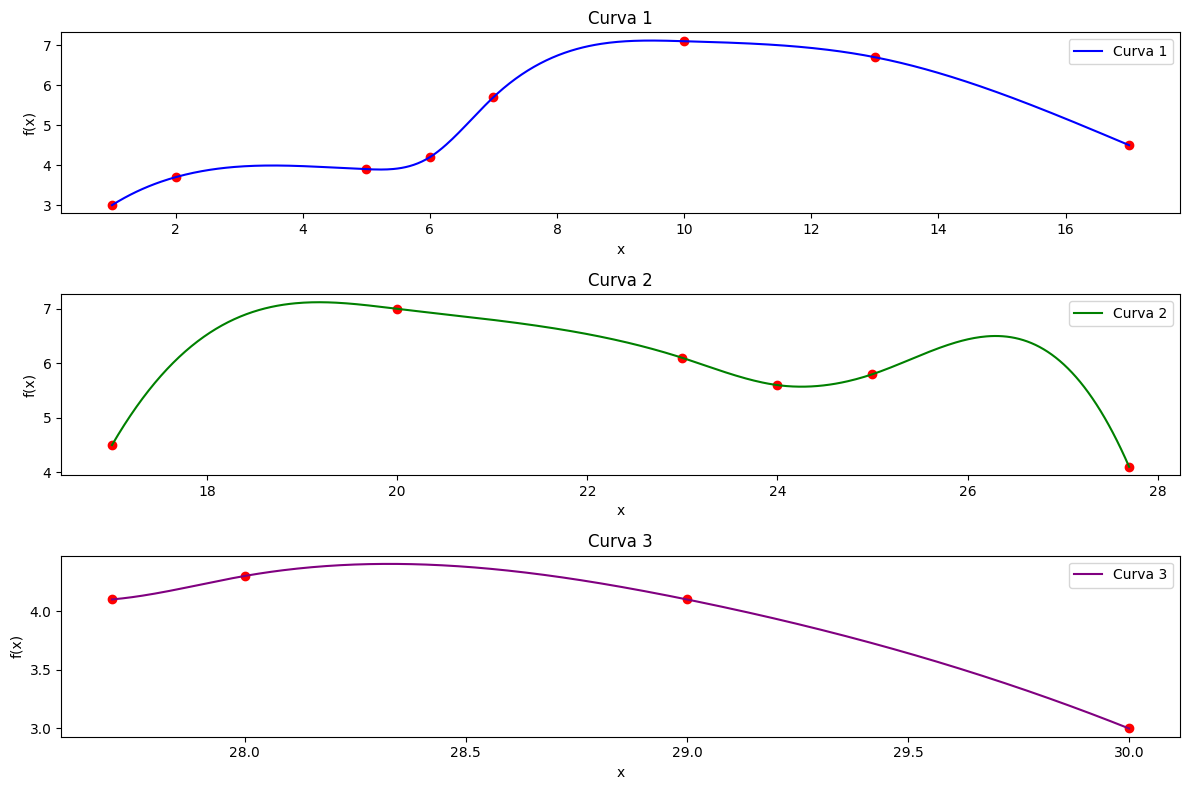

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Función cubic_spline_clamped proporcionada (no la redefinimos aquí)

# Definimos los datos de las tres curvas
curva1_xs = [1, 2, 5, 6, 7, 10, 13, 17]
curva1_ys = [3.0, 3.7, 3.9, 4.2, 5.7, 7.1, 6.7, 4.5]
curva1_d0 = 1.0
curva1_dn = -0.67

curva2_xs = [17, 20, 23, 24, 25, 27.7]
curva2_ys = [4.5, 7.0, 6.1, 5.6, 5.8, 4.1]
curva2_d0 = 3.0
curva2_dn = -4.0

curva3_xs = [27.7, 28, 29, 30]
curva3_ys = [4.1, 4.3, 4.1, 3.0]
curva3_d0 = 0.33
curva3_dn = -1.5

# Generamos los splines para cada curva
splines_curva1 = cubic_spline_clamped(curva1_xs, curva1_ys, curva1_d0, curva1_dn)
splines_curva2 = cubic_spline_clamped(curva2_xs, curva2_ys, curva2_d0, curva2_dn)
splines_curva3 = cubic_spline_clamped(curva3_xs, curva3_ys, curva3_d0, curva3_dn)

# Mostramos los resultados de cada curva
print("Splines para Curva 1:")
_ = [display(s) for s in splines_curva1]
print("______")
_ = [display(s.expand()) for s in splines_curva1]

print("\nSplines para Curva 2:")
_ = [display(s) for s in splines_curva2]
print("______")
_ = [display(s.expand()) for s in splines_curva2]

print("\nSplines para Curva 3:")
_ = [display(s) for s in splines_curva3]
print("______")
_ = [display(s.expand()) for s in splines_curva3]

# Crear una función para evaluar el spline cúbico
def eval_spline(splines, x_vals, x_points):
    x = sym.Symbol('x')
    y_vals = []
    for x_val in x_vals:
        for i, spline in enumerate(splines):
            if x_val <= x_points[i + 1]:
                y_vals.append(spline.evalf(subs={x: x_val}))
                break
    return y_vals

# Rango de valores para graficar
x_range1 = np.linspace(curva1_xs[0], curva1_xs[-1], 500)
x_range2 = np.linspace(curva2_xs[0], curva2_xs[-1], 500)
x_range3 = np.linspace(curva3_xs[0], curva3_xs[-1], 500)

# Evaluar los splines en el rango de valores
y_vals1 = eval_spline(splines_curva1, x_range1, curva1_xs)
y_vals2 = eval_spline(splines_curva2, x_range2, curva2_xs)
y_vals3 = eval_spline(splines_curva3, x_range3, curva3_xs)

# Graficar los resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x_range1, y_vals1, label='Curva 1', color='blue')
plt.scatter(curva1_xs, curva1_ys, color='red')
plt.title('Curva 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(x_range2, y_vals2, label='Curva 2', color='green')
plt.scatter(curva2_xs, curva2_ys, color='red')
plt.title('Curva 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(x_range3, y_vals3, label='Curva 3', color='purple')
plt.scatter(curva3_xs, curva3_ys, color='red')
plt.title('Curva 3')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.show()
